In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
label = pd.read_csv('Data/Data_labeled.csv')

### 사출공정의 불량 원인 인자 파악을 위한 머신러닝 모델 개발

In [22]:
def evaluate(test_y, pred_y):
    ac_score = accuracy_score(test_y, pred_y)
    pr_score = precision_score(test_y, pred_y)
    rc_score = recall_score(test_y, pred_y)
    f_score = f1_score(test_y, pred_y)
    con_score = confusion_matrix(test_y, pred_y)
    ra_score = roc_auc_score(test_y, pred_y)
    
    print("accuracy : ", ac_score)
    print("precision : ", pr_score)
    print("recall :", rc_score)
    print("f1_score :", f_score)
    print("rocauc_score :", ra_score)
    print(con_score)

In [23]:
def run_model(model):
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    evaluate(test_y, pred_y)

In [24]:
def feature_importance(model):    # Display feature importance.
    importance = pd.DataFrame({
        'features': X.columns,
        'importance': model.feature_importances_
    })
    importance.sort_values(by='importance', inplace=True)

    plt.figure(figsize=(12, 16))
    plt.barh(importance['features'], importance['importance'])
    plt.title(model)
    plt.show()


########Rando###########
accuracy :  0.8372093023255814
precision :  0.7692307692307693
recall : 0.9523809523809523
f1_score : 0.8510638297872339
rocauc_score : 0.8398268398268398
[[16  6]
 [ 1 20]]
########Decis###########
accuracy :  0.7906976744186046
precision :  0.7727272727272727
recall : 0.8095238095238095
f1_score : 0.7906976744186046
rocauc_score : 0.7911255411255411
[[17  5]
 [ 4 17]]
########SVC()###########
accuracy :  0.813953488372093
precision :  0.76
recall : 0.9047619047619048
f1_score : 0.8260869565217391
rocauc_score : 0.816017316017316
[[16  6]
 [ 2 19]]
########LGBMC###########
accuracy :  0.8372093023255814
precision :  0.7916666666666666
recall : 0.9047619047619048
f1_score : 0.8444444444444444
rocauc_score : 0.8387445887445887
[[17  5]
 [ 2 19]]
########XGBCl###########
[09:41:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly se

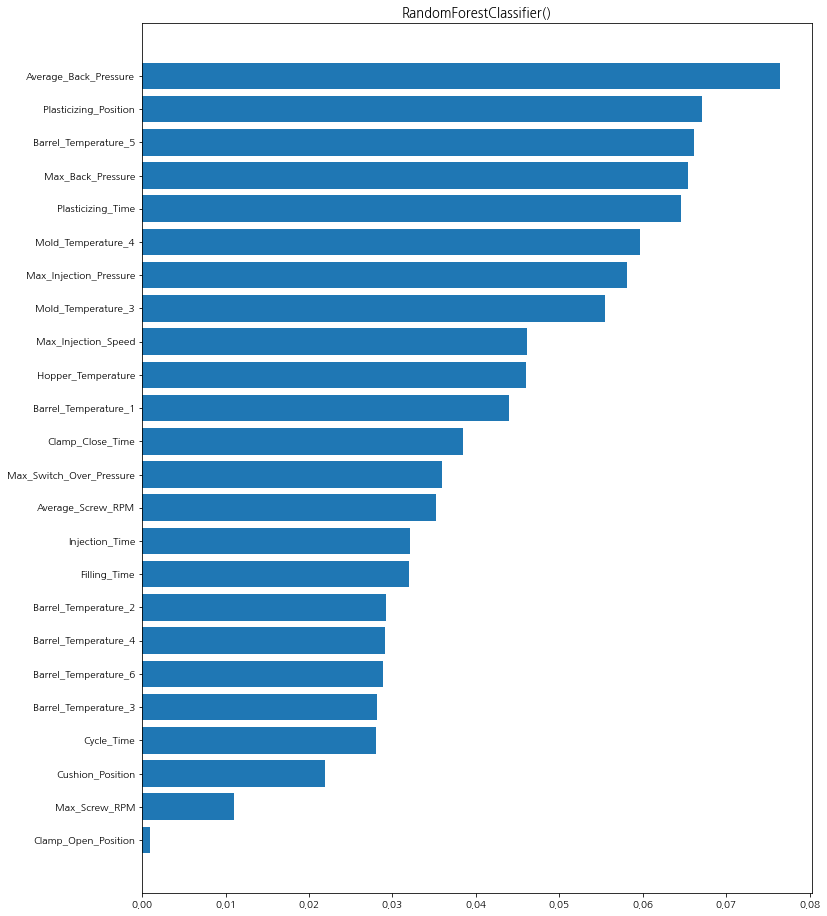

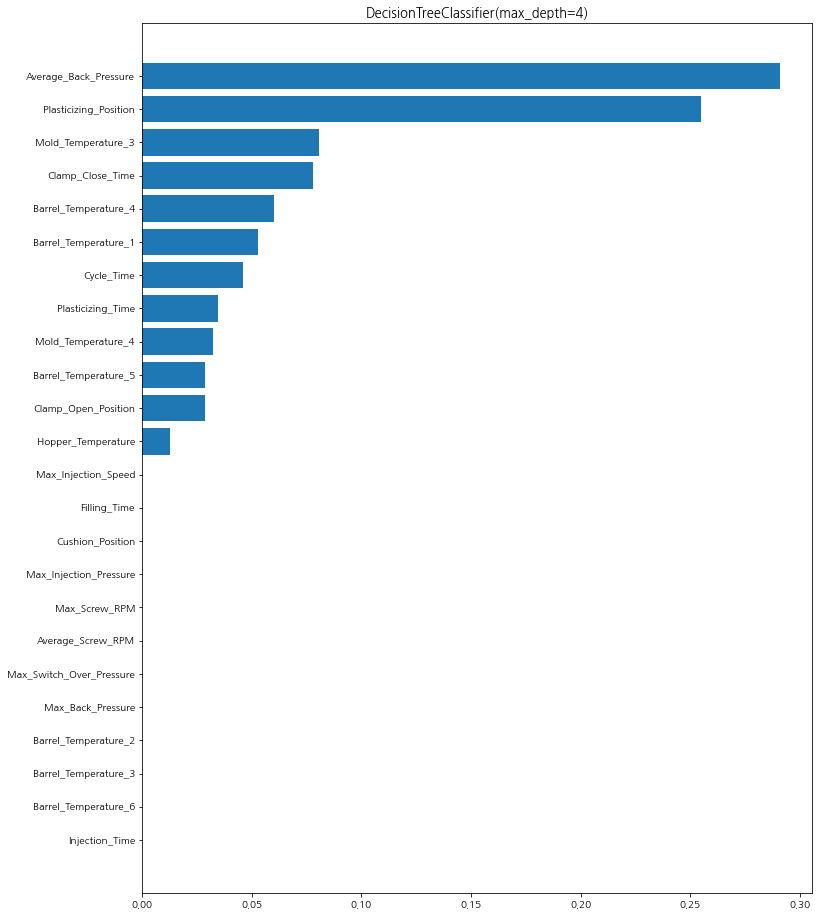

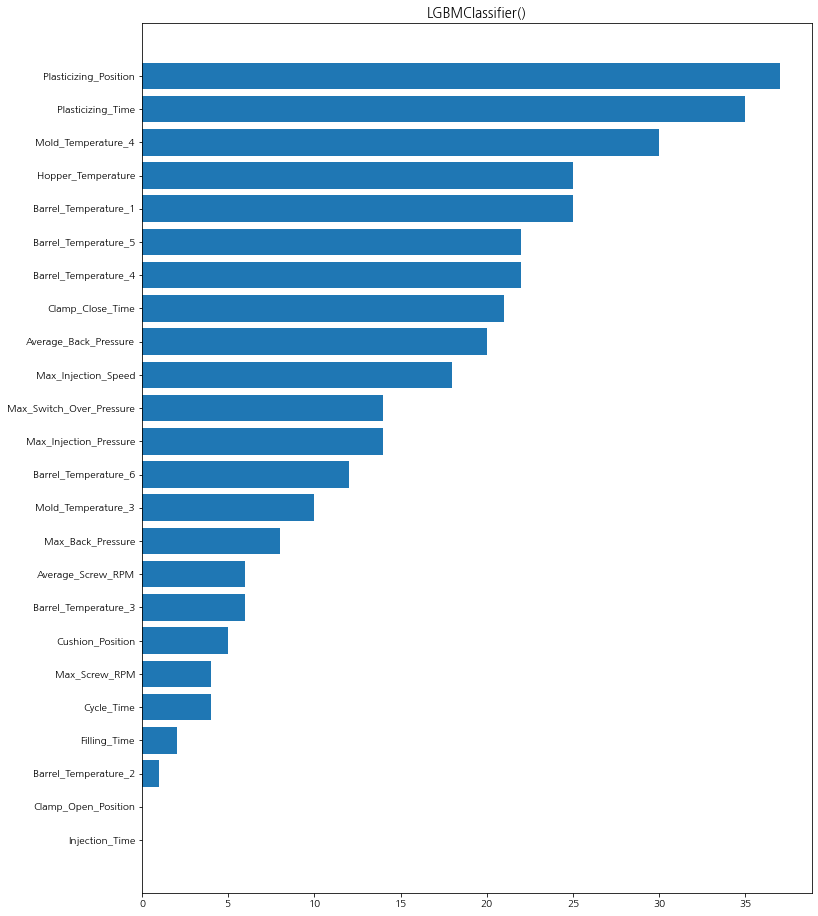

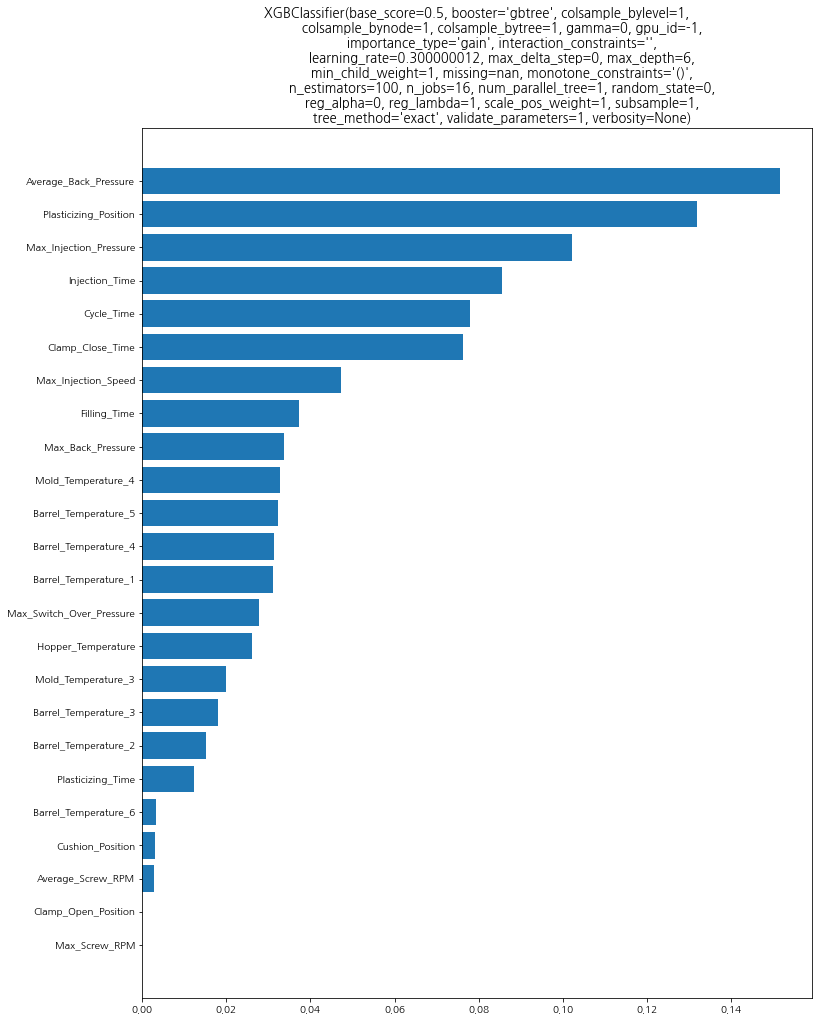

[None, None, None, None]

In [53]:
# 양품 데이터 undersampling 진행
con_label['PassOrFail'] = con_label['PassOrFail'].replace('Y', 0)
con_label['PassOrFail'] = con_label['PassOrFail'].replace('N', 1)

con_label_n = con_label.loc[con_label['PassOrFail'] == 1]
con_label_y = con_label.loc[con_label['PassOrFail'] == 0]
con_label_y = con_label_y.sample(len(con_label_n), random_state = 2021)

con_label = pd.concat([con_label_y, con_label_n])

X = con_label.drop(['PassOrFail'], axis = 1)
Y = con_label['PassOrFail']

# stratify 옵션을 통해 양품과 불량품 고르게 분배
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, shuffle=True, stratify=Y, random_state = 2020)

scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth = 4)
svc = SVC()
lgbm = LGBMClassifier()
xgb = XGBClassifier()
mlp = MLPClassifier()

model_li = [rf, dt, svc, lgbm, xgb, mlp]

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

model_list = [rf, dt, lgbm, xgb]
[feature_importance(i) for i in model_list]

########Rando###########
accuracy :  0.9166666666666666
precision :  0.8571428571428571
recall : 1.0
f1_score : 0.923076923076923
rocauc_score : 0.9166666666666667
[[10  2]
 [ 0 12]]
########Decis###########
accuracy :  0.875
precision :  0.8
recall : 1.0
f1_score : 0.888888888888889
rocauc_score : 0.875
[[ 9  3]
 [ 0 12]]
########SVC()###########
accuracy :  0.9166666666666666
precision :  0.8571428571428571
recall : 1.0
f1_score : 0.923076923076923
rocauc_score : 0.9166666666666667
[[10  2]
 [ 0 12]]
########LGBMC###########
accuracy :  0.875
precision :  0.8
recall : 1.0
f1_score : 0.888888888888889
rocauc_score : 0.875
[[ 9  3]
 [ 0 12]]
########XGBCl###########
[10:51:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  0.9166666666666666
precision :  0.8571428571428571
recall : 1

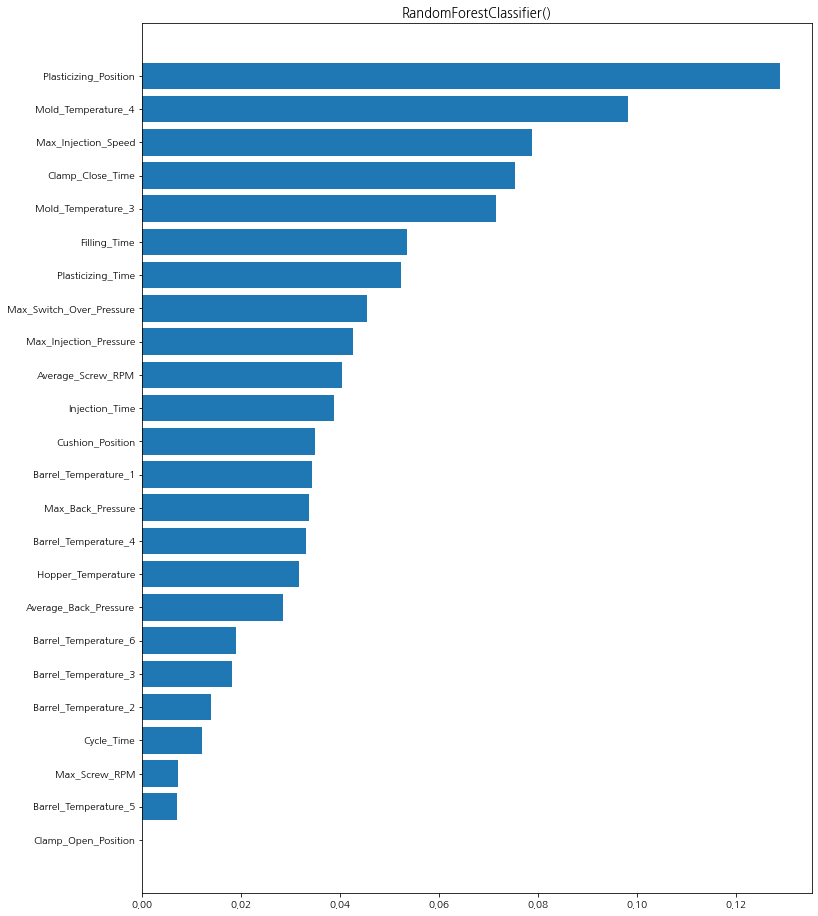

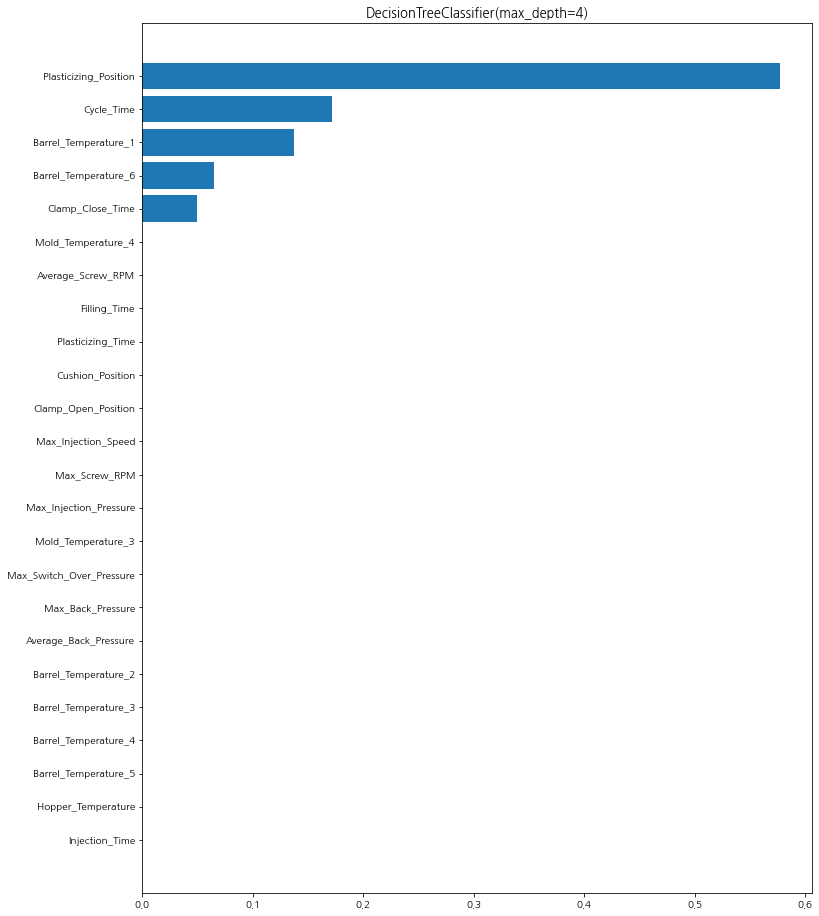

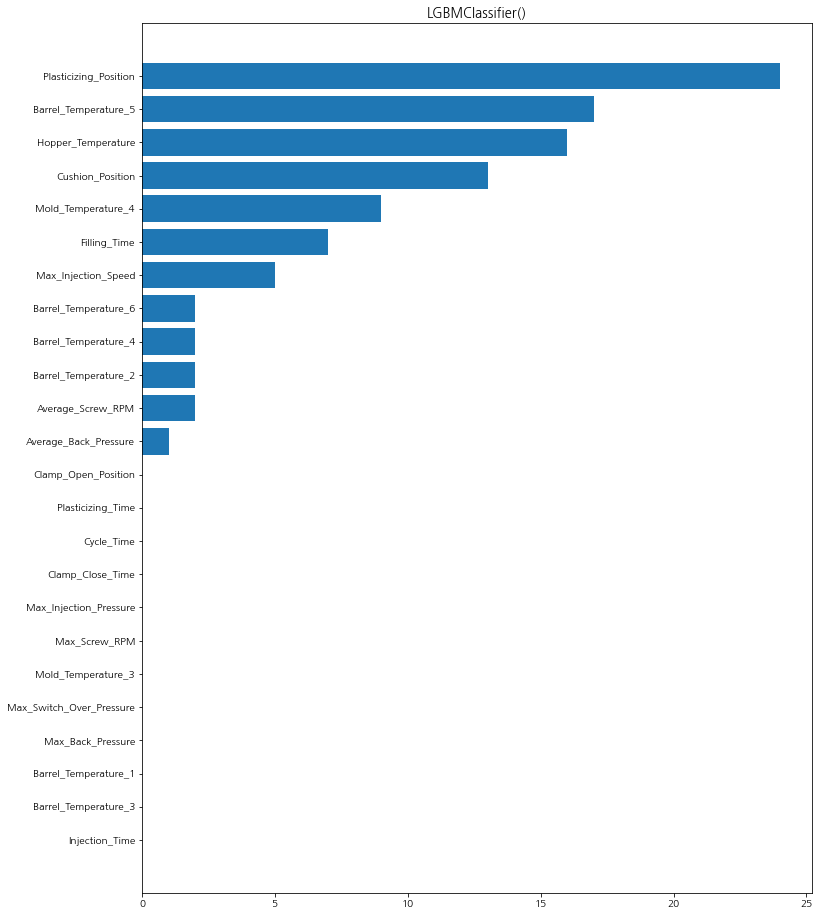

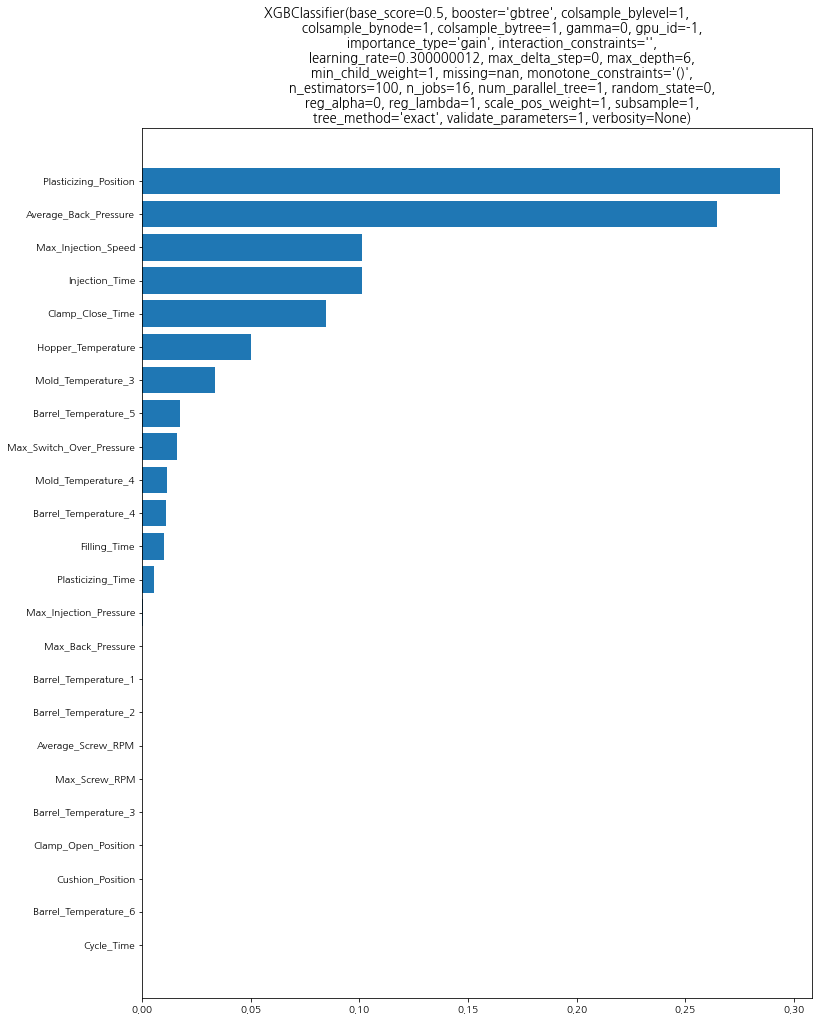

[None, None, None, None]

In [55]:
# 양품 데이터 undersampling 진행
cn7_label['PassOrFail'] = cn7_label['PassOrFail'].replace('Y', 0)
cn7_label['PassOrFail'] = cn7_label['PassOrFail'].replace('N', 1)

cn7_label_n = cn7_label.loc[cn7_label['PassOrFail'] == 1]
cn7_label_y = cn7_label.loc[cn7_label['PassOrFail'] == 0]
cn7_label_y = cn7_label_y.sample(len(cn7_label_n), random_state = 2021)

cn7_label = pd.concat([cn7_label_y, cn7_label_n])

X = cn7_label.drop(['PassOrFail'], axis = 1)
Y = cn7_label['PassOrFail']

# stratify 옵션을 통해 양품과 불량품 고르게 분배
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, shuffle=True, stratify=Y, random_state = 2021)

scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth = 4)
svc = SVC()
lgbm = LGBMClassifier()
xgb = XGBClassifier()
mlp = MLPClassifier()

model_li = [rf, dt, svc, lgbm, xgb, mlp]

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)
    
model_list = [rf, dt, lgbm, xgb]
[feature_importance(i) for i in model_list]

########Rando###########
accuracy :  0.4
precision :  0.375
recall : 0.3
f1_score : 0.33333333333333326
rocauc_score : 0.4
[[5 5]
 [7 3]]
########Decis###########
accuracy :  0.3
precision :  0.3
recall : 0.3
f1_score : 0.3
rocauc_score : 0.30000000000000004
[[3 7]
 [7 3]]
########SVC()###########
accuracy :  0.3
precision :  0.16666666666666666
recall : 0.1
f1_score : 0.125
rocauc_score : 0.30000000000000004
[[5 5]
 [9 1]]
########LGBMC###########
accuracy :  0.5
precision :  0.5
recall : 0.3
f1_score : 0.37499999999999994
rocauc_score : 0.49999999999999994
[[7 3]
 [7 3]]
########XGBCl###########
[10:53:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  0.3
precision :  0.25
recall : 0.2
f1_score : 0.22222222222222224
rocauc_score : 0.3
[[4 6]
 [8 2]]
########MLPCl###########
accura

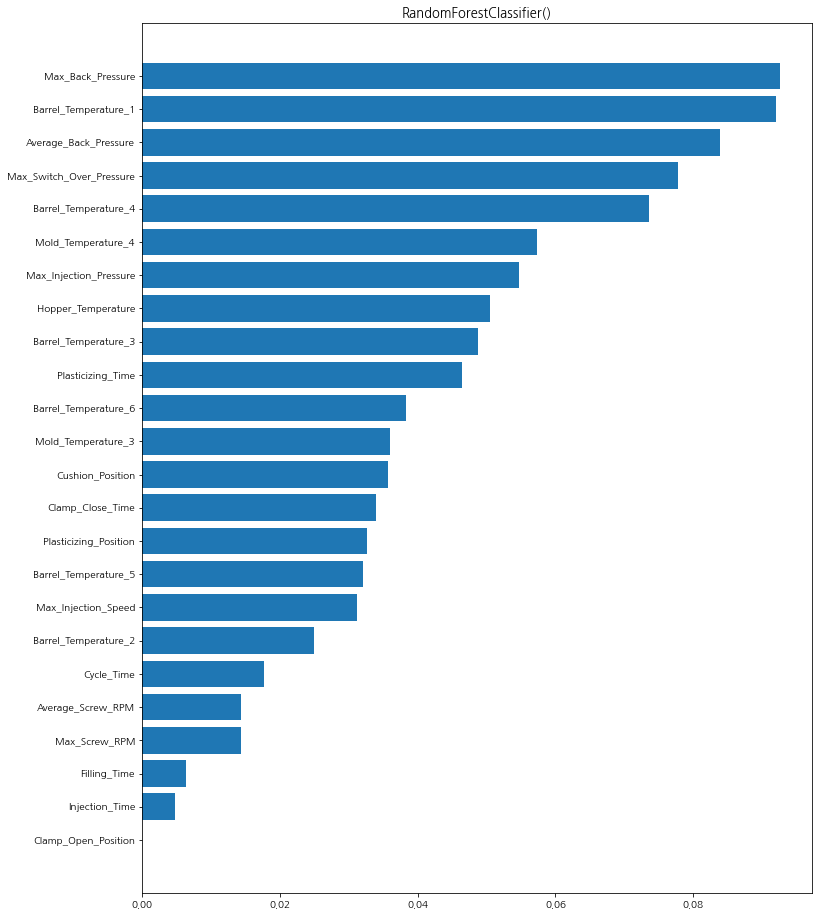

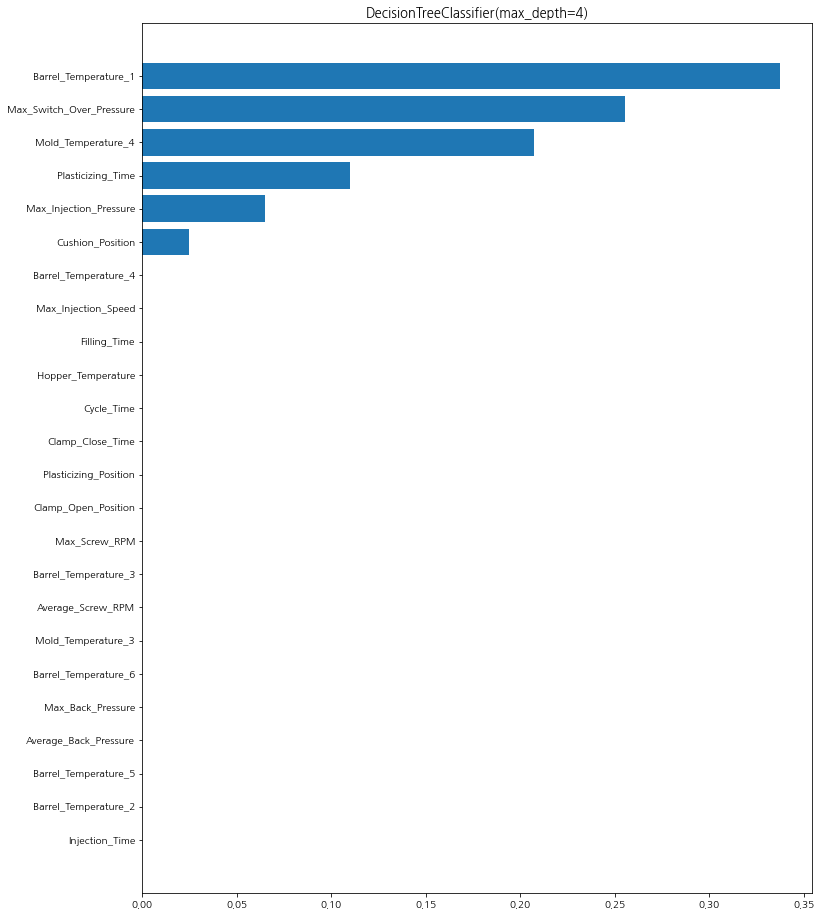

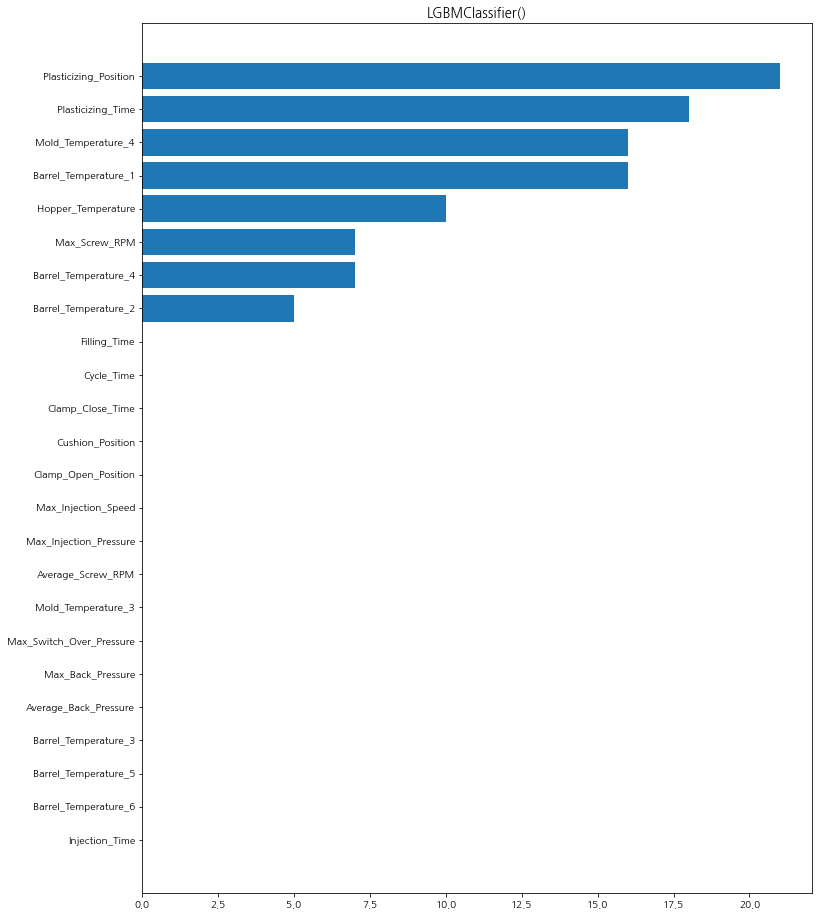

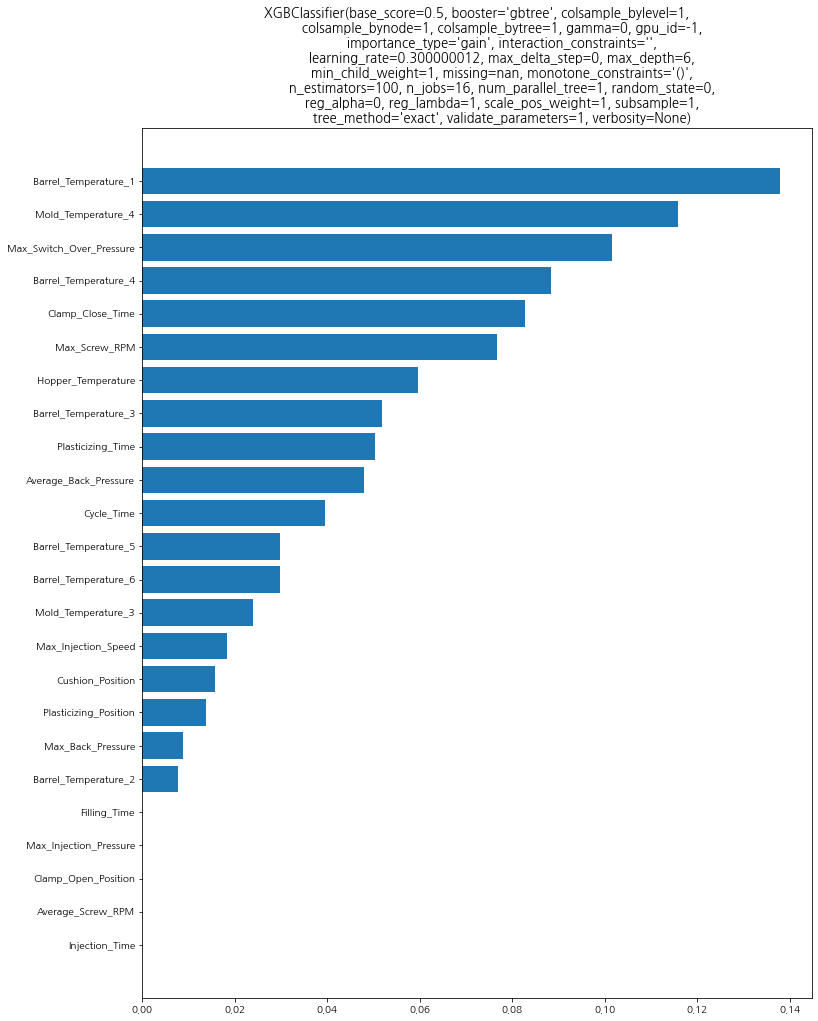

[None, None, None, None]

In [57]:
# 양품 데이터 undersampling 진행
rg3_label['PassOrFail'] = rg3_label['PassOrFail'].replace('Y', 0)
rg3_label['PassOrFail'] = rg3_label['PassOrFail'].replace('N', 1)

rg3_label_n = rg3_label.loc[rg3_label['PassOrFail'] == 1]
rg3_label_y = rg3_label.loc[rg3_label['PassOrFail'] == 0]
rg3_label_y = rg3_label_y.sample(len(rg3_label_n), random_state = 2021)

rg3_label = pd.concat([rg3_label_y, rg3_label_n])

X = rg3_label.drop(['PassOrFail'], axis = 1)
Y = rg3_label['PassOrFail']

# stratify 옵션을 통해 양품과 불량품 고르게 분배
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, shuffle=True, stratify=Y, random_state = 2021)

scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth = 4)
svc = SVC()
lgbm = LGBMClassifier()
xgb = XGBClassifier()
mlp = MLPClassifier()

model_li = [rf, dt, svc, lgbm, xgb, mlp]

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)
    
model_list = [rf, dt, lgbm, xgb]
[feature_importance(i) for i in model_list]

### 사출품 품질 예측을 위한 인공지능 모델 개발

In [28]:
label = pd.read_csv('Data/Data_labeled.csv')

In [29]:
label = label.loc[label['EQUIP_NAME'] == "650톤-우진2호기"]

con_label = label
cn7_label = label.loc[(label['PART_NAME'] == "CN7 W/S SIDE MLD'G RH") | (label['PART_NAME'] == "CN7 W/S SIDE MLD'G LH")]
rg3_label = label.loc[(label['PART_NAME'] == "RG3 MOLD'G W/SHLD, RH") | (label['PART_NAME'] == "RG3 MOLD'G W/SHLD, LH")]

In [30]:
# 불필요 컬럼 제거
# Mold_Temp 값 0인것들 많음
drop_li = ['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'Reason', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Barrel_Temperature_7',
          'Switch_Over_Position', 'Mold_Temperature_1', 'Mold_Temperature_2','Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7', 
           'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12']

In [31]:
con_label = con_label.drop(drop_li, axis = 1)
cn7_label = cn7_label.drop(drop_li, axis = 1)
rg3_label = rg3_label.drop(drop_li, axis = 1)

In [32]:
# 종속변수 y : 0, n : 1 바꾸기
con_label['PassOrFail'] = con_label['PassOrFail'].replace('Y', 0)
con_label['PassOrFail'] = con_label['PassOrFail'].replace('N', 1)

cn7_label['PassOrFail'] = cn7_label['PassOrFail'].replace('Y', 0)
cn7_label['PassOrFail'] = cn7_label['PassOrFail'].replace('N', 1)

rg3_label['PassOrFail'] = rg3_label['PassOrFail'].replace('Y', 0)
rg3_label['PassOrFail'] = rg3_label['PassOrFail'].replace('N', 1)

In [33]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth = 4)
svc = SVC()
lgbm = LGBMClassifier()
xgb = XGBClassifier()
mlp = MLPClassifier()
deep_mlp = MLPClassifier(hidden_layer_sizes = (100, 150, 100))

model_li = [rf, dt, svc, lgbm, xgb, mlp, deep_mlp]

In [34]:
# cn7 & rg3 사출품 품질 예측
X = con_label.iloc[:, 1:]
Y = con_label.iloc[:, 0]

scale = StandardScaler()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 2021)

train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

########Rando###########
accuracy :  0.9883236030025021
precision :  0.3157894736842105
recall : 0.2857142857142857
f1_score : 0.3
rocauc_score : 0.6401226035218462
[[2364   13]
 [  15    6]]
########Decis###########
accuracy :  0.9937447873227689
precision :  1.0
recall : 0.2857142857142857
f1_score : 0.4444444444444445
rocauc_score : 0.6428571428571428
[[2377    0]
 [  15    6]]
########SVC()###########
accuracy :  0.9929107589658048
precision :  1.0
recall : 0.19047619047619047
f1_score : 0.32
rocauc_score : 0.5952380952380952
[[2377    0]
 [  17    4]]
########LGBMC###########
accuracy :  0.9883236030025021
precision :  0.3157894736842105
recall : 0.2857142857142857
f1_score : 0.3
rocauc_score : 0.6401226035218462
[[2364   13]
 [  15    6]]
########XGBCl###########
[07:52:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

In [35]:
# cn7 사출품 품질 예측
X = cn7_label.iloc[:, 1:]
Y = cn7_label.iloc[:, 0]

scale = StandardScaler()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 2021)

train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

########Rando###########
accuracy :  0.9960415635823849
precision :  0.6428571428571429
recall : 0.75
f1_score : 0.6923076923076924
rocauc_score : 0.8737555998008959
[[2004    5]
 [   3    9]]
########Decis###########
accuracy :  0.9985155863433943
precision :  1.0
recall : 0.75
f1_score : 0.8571428571428571
rocauc_score : 0.875
[[2009    0]
 [   3    9]]
########SVC()###########
accuracy :  0.9975259772389906
precision :  1.0
recall : 0.5833333333333334
f1_score : 0.7368421052631579
rocauc_score : 0.7916666666666667
[[2009    0]
 [   5    7]]
########LGBMC###########
accuracy :  0.9960415635823849
precision :  0.6428571428571429
recall : 0.75
f1_score : 0.6923076923076924
rocauc_score : 0.8737555998008959
[[2004    5]
 [   3    9]]
########XGBCl###########
[07:53:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restor

In [36]:
# rg3 사출품 품질 예측
X = rg3_label.iloc[:, 1:]
Y = rg3_label.iloc[:, 0]

scale = StandardScaler()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 2021)

train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

########Rando###########
accuracy :  0.9655172413793104
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.49591280653950953
[[364   3]
 [ 10   0]]
########Decis###########
accuracy :  0.9734748010610079
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[367   0]
 [ 10   0]]
########SVC()###########
accuracy :  0.9734748010610079
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[367   0]
 [ 10   0]]
########LGBMC###########
accuracy :  0.9655172413793104
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.49591280653950953
[[364   3]
 [ 10   0]]
########XGBCl###########
[07:53:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  0.9655172413793104
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.49591280653950953
[[364   

### SMOTE 적용

In [37]:
sm = SMOTE(sampling_strategy = 'auto', random_state = 2021)

In [38]:
X = con_label.iloc[:, 1:]
Y = con_label.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 2020)

x_resampled, y_resampled = sm.fit_resample(train_x, train_y)

print('smote 적용 전 학습 데이터 분포:\n', train_y.value_counts())
print('smote 적용 후 학습 데이터 분포:\n', y_resampled.value_counts())

retrain_x = scale.fit_transform(x_resampled)
test_x = scale.transform(test_x)

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

smote 적용 전 학습 데이터 분포:
 0    5544
1      50
Name: PassOrFail, dtype: int64
smote 적용 후 학습 데이터 분포:
 1    5544
0    5544
Name: PassOrFail, dtype: int64
########Rando###########
accuracy :  0.008757297748123435
precision :  0.008757297748123435
recall : 1.0
f1_score : 0.017362546506820998
rocauc_score : 0.5
[[   0 2377]
 [   0   21]]
########Decis###########
accuracy :  0.008757297748123435
precision :  0.008757297748123435
recall : 1.0
f1_score : 0.017362546506820998
rocauc_score : 0.5
[[   0 2377]
 [   0   21]]
########SVC()###########
accuracy :  0.9912427022518766
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[2377    0]
 [  21    0]]
########LGBMC###########
accuracy :  0.9912427022518766
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[2377    0]
 [  21    0]]
########XGBCl###########
[07:53:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error'

In [39]:
X = cn7_label.iloc[:, 1:]
Y = cn7_label.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 2020)

x_resampled, y_resampled = sm.fit_resample(train_x, train_y)

print('smote 적용 전 학습 데이터 분포:\n', train_y.value_counts())
print('smote 적용 후 학습 데이터 분포:\n', y_resampled.value_counts())

retrain_x = scale.fit_transform(x_resampled)
test_x = scale.transform(test_x)

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

smote 적용 전 학습 데이터 분포:
 0    4688
1      27
Name: PassOrFail, dtype: int64
smote 적용 후 학습 데이터 분포:
 1    4688
0    4688
Name: PassOrFail, dtype: int64
########Rando###########
accuracy :  0.005937654626422563
precision :  0.005937654626422563
recall : 1.0
f1_score : 0.011805213969503198
rocauc_score : 0.5
[[   0 2009]
 [   0   12]]
########Decis###########
accuracy :  0.005937654626422563
precision :  0.005937654626422563
recall : 1.0
f1_score : 0.011805213969503198
rocauc_score : 0.5
[[   0 2009]
 [   0   12]]
########SVC()###########
accuracy :  0.9940623453735774
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[2009    0]
 [  12    0]]
########LGBMC###########
accuracy :  0.005937654626422563
precision :  0.005937654626422563
recall : 1.0
f1_score : 0.011805213969503198
rocauc_score : 0.5
[[   0 2009]
 [   0   12]]
########XGBCl###########
[07:53:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binar

In [40]:
X = rg3_label.iloc[:, 1:]
Y = rg3_label.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 2020)

x_resampled, y_resampled = sm.fit_resample(train_x, train_y)

print('smote 적용 전 학습 데이터 분포:\n', train_y.value_counts())
print('smote 적용 후 학습 데이터 분포:\n', y_resampled.value_counts())

retrain_x = scale.fit_transform(x_resampled)
test_x = scale.transform(test_x)

for n, i in enumerate(model_li):
    print(f'########{str(model_li[n])[:5]}###########')
    run_model(i)

smote 적용 전 학습 데이터 분포:
 0    857
1     22
Name: PassOrFail, dtype: int64
smote 적용 후 학습 데이터 분포:
 1    857
0    857
Name: PassOrFail, dtype: int64
########Rando###########
accuracy :  0.9734748010610079
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[367   0]
 [ 10   0]]
########Decis###########
accuracy :  0.9734748010610079
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[367   0]
 [ 10   0]]
########SVC()###########
accuracy :  0.9734748010610079
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[367   0]
 [ 10   0]]
########LGBMC###########
accuracy :  0.9734748010610079
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.5
[[367   0]
 [ 10   0]]
########XGBCl###########
[07:53:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accurac

### 오토인코더 모델

In [41]:
con_label_y = con_label.loc[con_label['PassOrFail'] == 0]
con_label_n = con_label.loc[con_label['PassOrFail'] == 1]

con_label_y = con_label_y.drop(['PassOrFail'], axis = 1)
con_label_n = con_label_n.drop(['PassOrFail'], axis = 1)

con_label_y = scale.fit_transform(con_label_y)
con_label_n = scale.fit_transform(con_label_n)

con_label_train_y, con_label_test_y = train_test_split(con_label_y, test_size = 0.3, shuffle = True)

# 양품 학습 데이터셋, 양품 테스트 데이터셋, 불량 테스트 데이터셋
print(con_label_train_y.shape, con_label_test_y.shape, con_label_n.shape)

(5544, 24) (2377, 24) (71, 24)


In [42]:
# 인코더
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation = 'relu'),
    Dense(5, activation = 'relu')
])

# 디코더
dropout_decoder = Sequential([
    Dense(15, activation = 'relu', input_shape = [5]),
    Dense(con_label_train_y.shape[1], activation = 'relu')
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

dropout_AE.compile(loss = 'mse', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

In [43]:
history = dropout_AE.fit(con_label_train_y, con_label_train_y, batch_size = 15, epochs = 100, validation_split = 0.2,
              callbacks = [EarlyStopping(monitor='val_loss', patience = 7, mode = 'min')])

Epoch 1/100
296/296 [==============================] - 1s 2ms/step - loss: 0.8331 - accuracy: 0.1531 - val_loss: 0.8147 - val_accuracy: 0.3183
Epoch 2/100
296/296 [==============================] - 1s 2ms/step - loss: 0.8052 - accuracy: 0.2474 - val_loss: 0.8035 - val_accuracy: 0.1921
Epoch 3/100
296/296 [==============================] - 1s 2ms/step - loss: 0.7953 - accuracy: 0.3468 - val_loss: 0.7939 - val_accuracy: 0.5329
Epoch 4/100
296/296 [==============================] - 1s 2ms/step - loss: 0.7719 - accuracy: 0.3962 - val_loss: 0.7631 - val_accuracy: 0.4581
Epoch 5/100
296/296 [==============================] - 1s 2ms/step - loss: 0.7597 - accuracy: 0.4318 - val_loss: 0.7605 - val_accuracy: 0.4662
Epoch 6/100
296/296 [==============================] - 1s 2ms/step - loss: 0.7584 - accuracy: 0.4566 - val_loss: 0.7596 - val_accuracy: 0.4950
Epoch 7/100
296/296 [==============================] - 1s 2ms/step - loss: 0.7585 - accuracy: 0.4433 - val_loss: 0.7600 - val_accuracy: 0.5005

In [44]:
con_label_train_pred = dropout_AE.predict(con_label_train_y)
con_label_train_loss = np.mean(np.square(con_label_train_pred - con_label_train_y), axis = 1)

# 복원 오류 임계치
threshold = np.mean(con_label_train_loss) + 3*np.std(con_label_train_pred)
print('복원 오류 임계치 :', threshold)

# 평가 데이터 양품
con_label_predict_y = dropout_AE.predict(con_label_test_y)
con_label_test_y_mse = np.mean(np.square(con_label_predict_y - con_label_test_y), axis = 1)

con_label_test_y_anomal = con_label_test_y_mse > threshold

# 평가 데이터 불량 
con_label_predict_n = dropout_AE.predict(con_label_n)
con_label_test_n_mse = np.mean(np.square(con_label_predict_n - con_label_n), axis = 1)

con_label_test_n_anomal = con_label_test_n_mse > threshold

con_label_true = np.concatenate([np.zeros(len(con_label_test_y_anomal)), np.ones(len(con_label_test_n_anomal))])
con_label_pred = np.concatenate([con_label_test_y_anomal, con_label_test_n_anomal])

evaluate(con_label_true, con_label_pred)

복원 오류 임계치 : 2.1197124363719686
accuracy :  0.8190359477124183
precision :  0.0
recall : 0.0
f1_score : 0.0
rocauc_score : 0.42175010517458983
[[2005  372]
 [  71    0]]


In [45]:
cn7_label_y = cn7_label.loc[cn7_label['PassOrFail'] == 0]
cn7_label_n = cn7_label.loc[cn7_label['PassOrFail'] == 1]

cn7_label_y = cn7_label_y.drop(['PassOrFail'], axis = 1)
cn7_label_n = cn7_label_n.drop(['PassOrFail'], axis = 1)

cn7_label_y = scale.fit_transform(cn7_label_y)
cn7_label_n = scale.fit_transform(cn7_label_n)

cn7_label_train_y, cn7_label_test_y = train_test_split(cn7_label_y, test_size = 0.3, shuffle = True)

# 양품 학습 데이터셋, 양품 테스트 데이터셋, 불량 테스트 데이터셋
print(cn7_label_train_y.shape, cn7_label_test_y.shape, cn7_label_n.shape)

(4687, 24) (2010, 24) (39, 24)


In [46]:
# 인코더
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation = 'relu'),
    Dense(5, activation = 'relu')
])

# 디코더
dropout_decoder = Sequential([
    Dense(15, activation = 'relu', input_shape = [5]),
    Dense(cn7_label_train_y.shape[1], activation = 'relu')
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

dropout_AE.compile(loss = 'mse', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

In [47]:
history = dropout_AE.fit(cn7_label_train_y, cn7_label_train_y, batch_size = 15, epochs = 100, validation_split = 0.2,
              callbacks = [EarlyStopping(monitor='val_loss', patience = 7, mode = 'min')])

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.8946 - accuracy: 0.3582 - val_loss: 0.8792 - val_accuracy: 0.5906
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.8544 - accuracy: 0.4983 - val_loss: 0.8839 - val_accuracy: 0.5437
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.8356 - accuracy: 0.4796 - val_loss: 0.8186 - val_accuracy: 0.5469
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7993 - accuracy: 0.4625 - val_loss: 0.8508 - val_accuracy: 0.5426
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.4927 - val_loss: 0.8416 - val_accuracy: 0.4691
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.8095 - accuracy: 0.4791 - val_loss: 0.8342 - val_accuracy: 0.4382
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8116 - accuracy: 0.4932 - val_loss: 0.8379 - val_accuracy: 0.5554

In [48]:
cn7_label_train_pred = dropout_AE.predict(cn7_label_train_y)
cn7_label_train_loss = np.mean(np.square(cn7_label_train_pred - cn7_label_train_y), axis = 1)

# 복원 오류 임계치
threshold = np.mean(cn7_label_train_loss) + 3*np.std(cn7_label_train_pred)
print('복원 오류 임계치 :', threshold)

# 평가 데이터 양품
cn7_label_predict_y = dropout_AE.predict(cn7_label_test_y)
cn7_label_test_y_mse = np.mean(np.square(cn7_label_predict_y - cn7_label_test_y), axis = 1)

cn7_label_test_y_anomal = cn7_label_test_y_mse > threshold

# 평가 데이터 불량 
cn7_label_predict_n = dropout_AE.predict(cn7_label_n)
cn7_label_test_n_mse = np.mean(np.square(cn7_label_predict_n - cn7_label_n), axis = 1)

cn7_label_test_n_anomal = cn7_label_test_n_mse > threshold

cn7_label_true = np.concatenate([np.zeros(len(cn7_label_test_y_anomal)), np.ones(len(cn7_label_test_n_anomal))])
cn7_label_pred = np.concatenate([cn7_label_test_y_anomal, cn7_label_test_n_anomal])

evaluate(cn7_label_true, cn7_label_pred)

복원 오류 임계치 : 1.9559855340475538
accuracy :  0.9755978526110298
precision :  0.21052631578947367
recall : 0.10256410256410256
f1_score : 0.13793103448275865
rocauc_score : 0.5475507079984692
[[1995   15]
 [  35    4]]


In [49]:
rg3_label_y = rg3_label.loc[rg3_label['PassOrFail'] == 0]
rg3_label_n = rg3_label.loc[rg3_label['PassOrFail'] == 1]

rg3_label_y = rg3_label_y.drop(['PassOrFail'], axis = 1)
rg3_label_n = rg3_label_n.drop(['PassOrFail'], axis = 1)

rg3_label_y = scale.fit_transform(rg3_label_y)
rg3_label_n = scale.fit_transform(rg3_label_n)

rg3_label_train_y, rg3_label_test_y = train_test_split(rg3_label_y, test_size = 0.3, shuffle = True)

# 양품 학습 데이터셋, 양품 테스트 데이터셋, 불량 테스트 데이터셋
print(rg3_label_train_y.shape, rg3_label_test_y.shape, rg3_label_n.shape)

(856, 24) (368, 24) (32, 24)


In [50]:
# 인코더
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation = 'relu'),
    Dense(5, activation = 'relu')
])

# 디코더
dropout_decoder = Sequential([
    Dense(15, activation = 'relu', input_shape = [5]),
    Dense(rg3_label_train_y.shape[1], activation = 'relu')
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

dropout_AE.compile(loss = 'mse', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

In [51]:
history = dropout_AE.fit(rg3_label_train_y, rg3_label_train_y, batch_size = 15, epochs = 100, validation_split = 0.2,
              callbacks = [EarlyStopping(monitor='val_loss', patience = 7, mode = 'min')])

Epoch 1/100
46/46 [==============================] - 0s 4ms/step - loss: 0.8770 - accuracy: 0.1155 - val_loss: 0.8081 - val_accuracy: 0.1860
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.1740 - val_loss: 0.7839 - val_accuracy: 0.2326
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7726 - accuracy: 0.2047 - val_loss: 0.7707 - val_accuracy: 0.2733
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.2295 - val_loss: 0.7529 - val_accuracy: 0.2791
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.2427 - val_loss: 0.7485 - val_accuracy: 0.2500
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7408 - accuracy: 0.2515 - val_loss: 0.7501 - val_accuracy: 0.2558
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.2675 - val_loss: 0.7415 - val_accuracy: 0.2674
Epoch 8/100
4

In [52]:
rg3_label_train_pred = dropout_AE.predict(rg3_label_train_y)
rg3_label_train_loss = np.mean(np.square(rg3_label_train_pred - rg3_label_train_y), axis = 1)

# 복원 오류 임계치
threshold = np.mean(rg3_label_train_loss) + 3*np.std(rg3_label_train_pred)
print('복원 오류 임계치 :', threshold)

# 평가 데이터 양품
rg3_label_predict_y = dropout_AE.predict(rg3_label_test_y)
rg3_label_test_y_mse = np.mean(np.square(rg3_label_predict_y - rg3_label_test_y), axis = 1)

rg3_label_test_y_anomal = rg3_label_test_y_mse > threshold

# 평가 데이터 불량 
rg3_label_predict_n = dropout_AE.predict(rg3_label_n)
rg3_label_test_n_mse = np.mean(np.square(rg3_label_predict_n - rg3_label_n), axis = 1)

rg3_label_test_n_anomal = rg3_label_test_n_mse > threshold

rg3_label_true = np.concatenate([np.zeros(len(rg3_label_test_y_anomal)), np.ones(len(rg3_label_test_n_anomal))])
rg3_label_pred = np.concatenate([rg3_label_test_y_anomal, rg3_label_test_n_anomal])

evaluate(rg3_label_true, rg3_label_pred)

복원 오류 임계치 : 2.079575363307132
accuracy :  0.8725
precision :  0.047619047619047616
recall : 0.03125
f1_score : 0.03773584905660377
rocauc_score : 0.48845108695652173
[[348  20]
 [ 31   1]]
